In [1]:
%matplotlib inline

In [2]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [3]:
# Import the California housing data set and get description
california_dataset = fetch_california_housing()

print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Read California housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [housing_data.sample(div) for x in range(0,nsamples)]
samples[1].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
11453,5.8880,13.0,5.922449,1.093878,1125.0,2.295918,33.67,-118.01,4.477
8201,3.1080,44.0,4.202000,0.992000,1038.0,2.076000,33.78,-118.14,2.179
8532,3.6486,29.0,4.298246,1.035088,2175.0,3.179825,33.89,-118.35,2.290
14356,3.3456,11.0,3.895023,1.126697,1960.0,1.773756,32.75,-117.23,1.598
3240,1.8500,14.0,4.541219,1.039427,1077.0,3.860215,36.09,-119.56,0.523


In [6]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 5
samples = [housing_data.sample(div) for x in range(0, nsamples)]
samples[24].head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
7050,3.6771,31.0,4.705263,1.068421,883.0,4.647368,33.93,-118.05,1.415
15550,2.2000,28.0,3.719361,1.039076,1556.0,2.763766,33.11,-117.08,1.277
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60,0.725
3403,5.2661,37.0,6.701887,1.135849,702.0,2.649057,34.26,-118.34,3.149
11267,5.4631,35.0,6.589404,1.046358,1614.0,3.562914,33.80,-117.97,2.256


In [7]:
# Calculate means
means = [s['MEDV'].mean() for s in samples]
# Calculate standard error on means
sems = [sem(s['MEDV']) for s in samples]

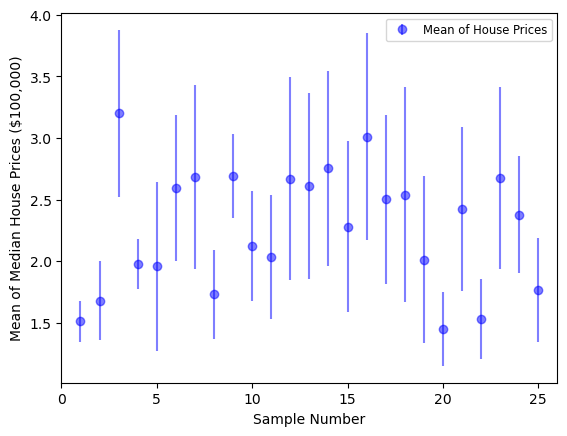

In [8]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices ($100,000)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [9]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 0.7077549419353109


In [10]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 0.16693669458809832
The sample with the smallest SEM is sample 1


In [11]:
# Compare to the population mean
print(f"The mean of the sample 5 is {samples[samp_index]['MEDV'].mean()}")
print(f"The mean of the population data set is {housing_data['MEDV'].mean()}")

The mean of the sample 5 is 1.5126
The mean of the population data set is 2.068558169089147


In [12]:
# Compare to the population mean
print(f"The mean of the sample 500 is {samples[samp_index]['MEDV'].mean()}")
print(f"The mean of the population data set is {housing_data['MEDV'].mean()}")


The mean of the sample 500 is 1.5126
The mean of the population data set is 2.068558169089147
